# The non-spatial analysis of camera time series

In [1]:
%matplotlib inline

import matplotlib
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 9.0)
from matplotlib.pyplot import cm 
from IPython.display import Image, display
import grass.script as gscript
import matplotlib.dates as mdates
import matplotlib.image as mpimg

In [2]:
def show_people_in_time(vector):
    res = gscript.read_command('v.db.select', map=vector, columns='cat,date,time', flags='c').strip()
    times = []
    last = None
    count = []
    n = 0

    for line in res.splitlines():
        cat, date, time = line.split('|')
        m, d, y = date.split('/')
        h, mn, s = time.split(':')
        t = dt.datetime(year=2000 + int(y), month=int(m), day=int(d), hour=int(h),
                        minute=int(mn), second=int(s))
        if last is None:
            last = t
            n = 1
        elif last != t:
            times.append(last)
            count.append(n)
            last = t
            n = 1
        else:
            n += 1

    spans = []
    spans_weekend = []
    for t in {t.date() for t in times}:
        a = dt.datetime(t.year, t.month, t.day, hour=6)
        b = dt.datetime(t.year, t.month, t.day, hour=19)
        if t.weekday() in (5, 6):
            spans_weekend.append((a, b))
        else:
            spans.append((a, b))

    count = [y for (x, y) in sorted(zip(times, count), key=lambda pair: pair[0])]
    times.sort()
    hours = mdates.HourLocator()  # every month
    days = mdates.DayLocator()  # every month
    f, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[3, 1]})
    ax1.plot(times, count, 'ro')
    ax1.plot(times, count, 'k--', alpha=0.4)
    for a, b in spans:
        ax1.axvspan(a, b, facecolor='g', alpha=0.05)
    for a, b in spans_weekend:
        ax1.axvspan(a, b, facecolor='b', alpha=0.05)
    ax1.xaxis.set_major_locator(days)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%a %d"))
    ax1.xaxis.set_minor_locator(hours)
    ax1.set_title("Camera " + vector.split('_')[-1] + " in " + t.strftime("%b") + ' ' + str(t.year))
    ax1.set_ylabel("Number of people")
    path = "/home/anna/Documents/Projects/Hipp_STC/pictures/camera_"
    image = mpimg.imread(path + vector.split('_')[-1] + '.jpg')
    ax2.imshow(image)
    ax2.axis("off")
    plt.show()

The **green** stripes show week days from 6am to 7pm, **blue** stripes show Saturday and Sunday from 6am to 7pm.

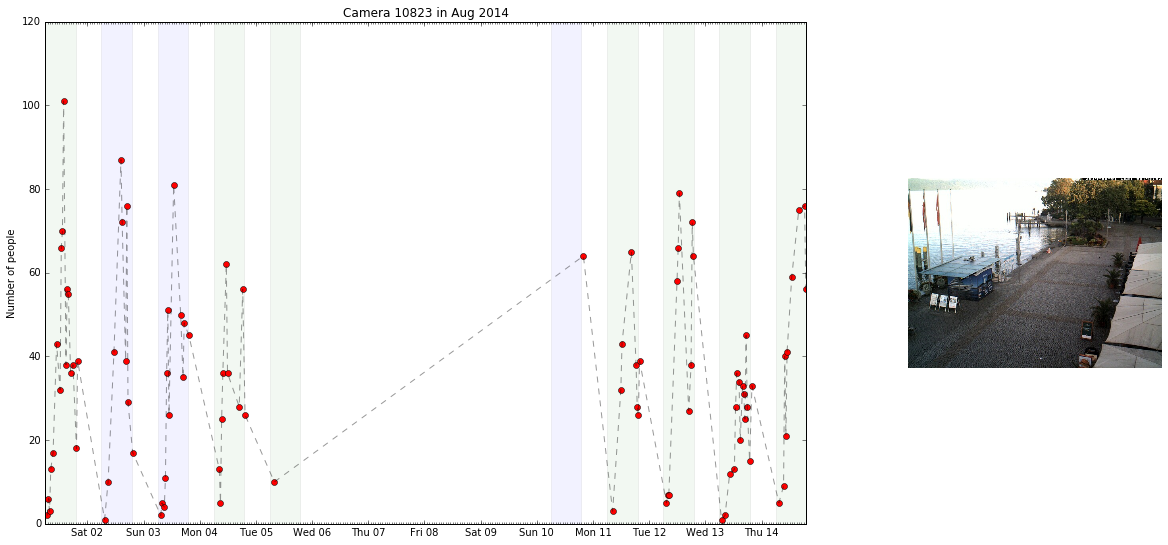

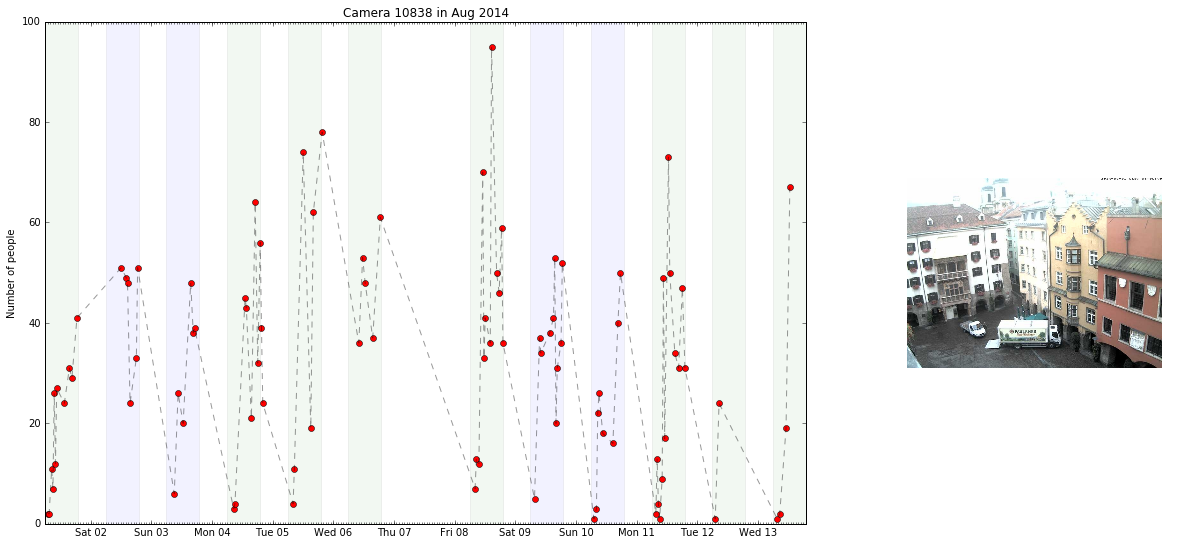

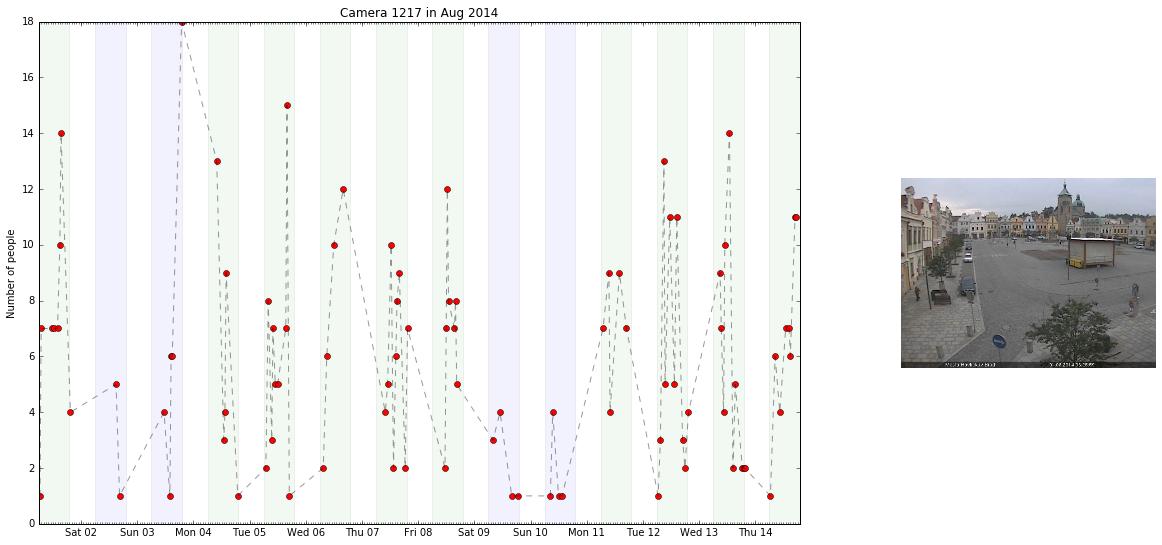

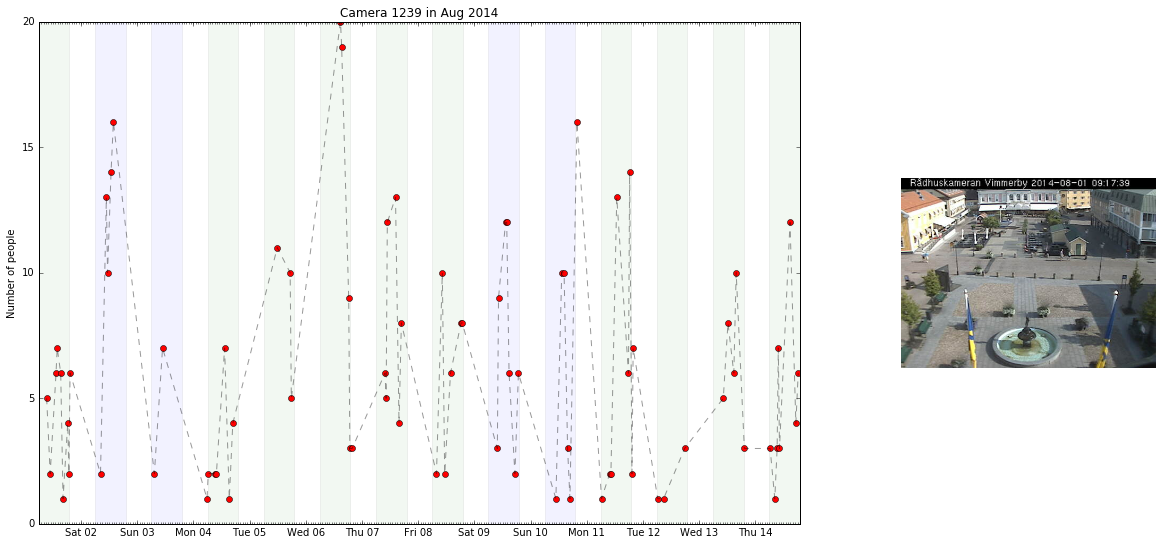

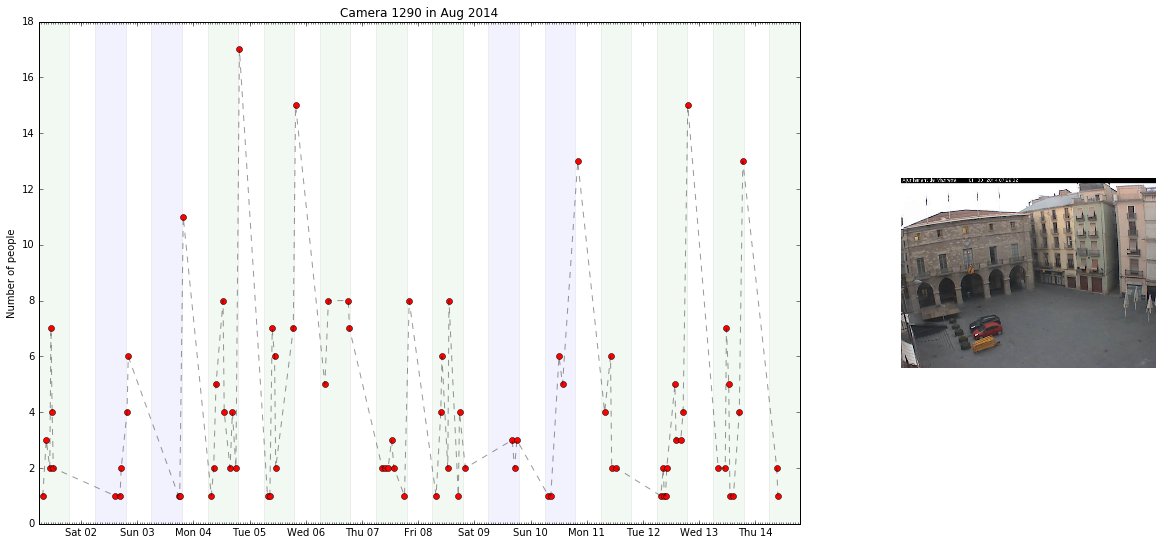

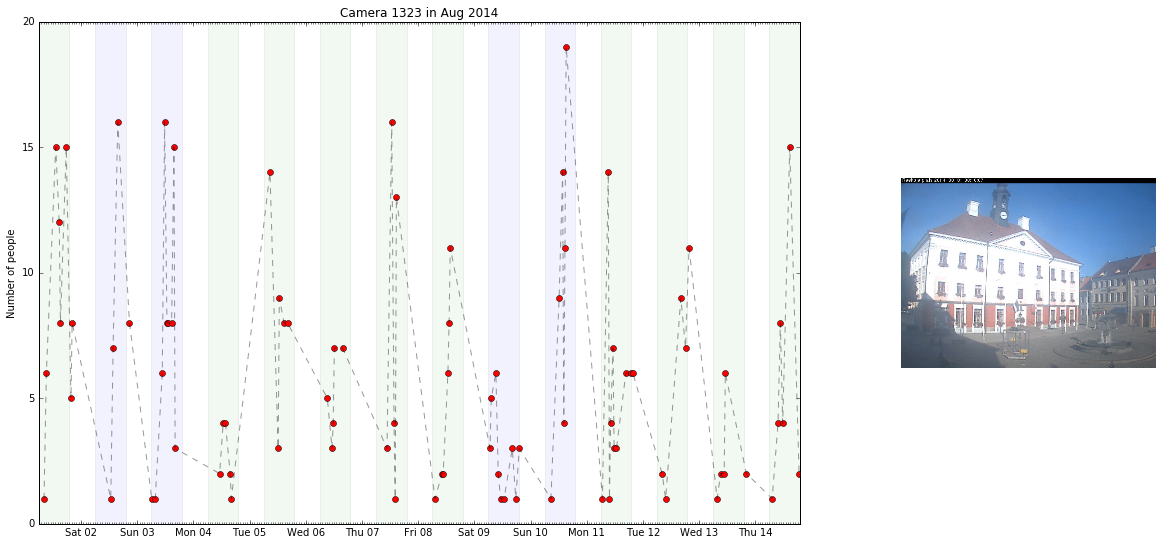

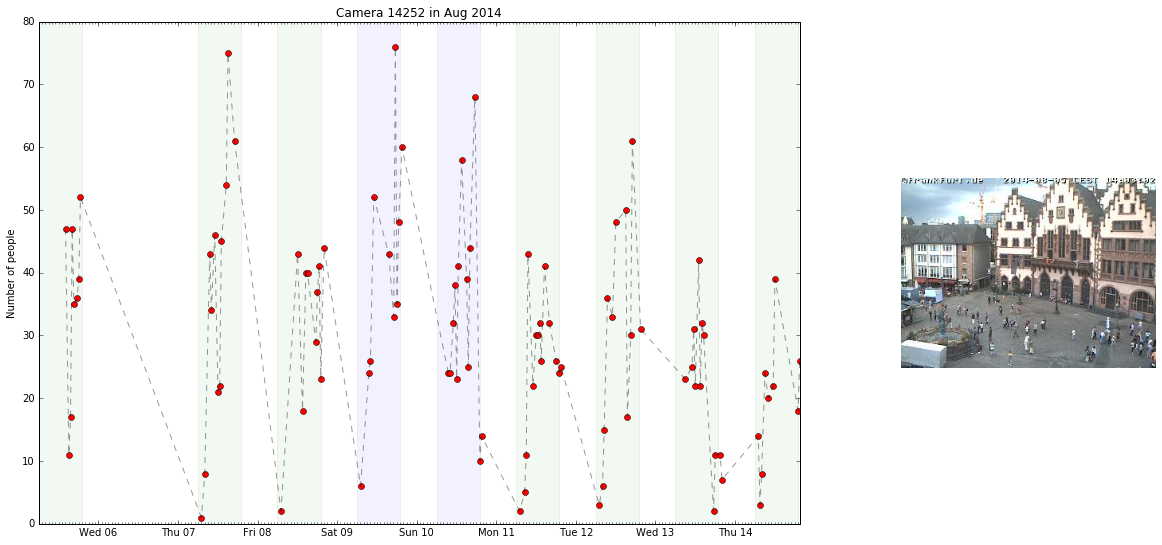

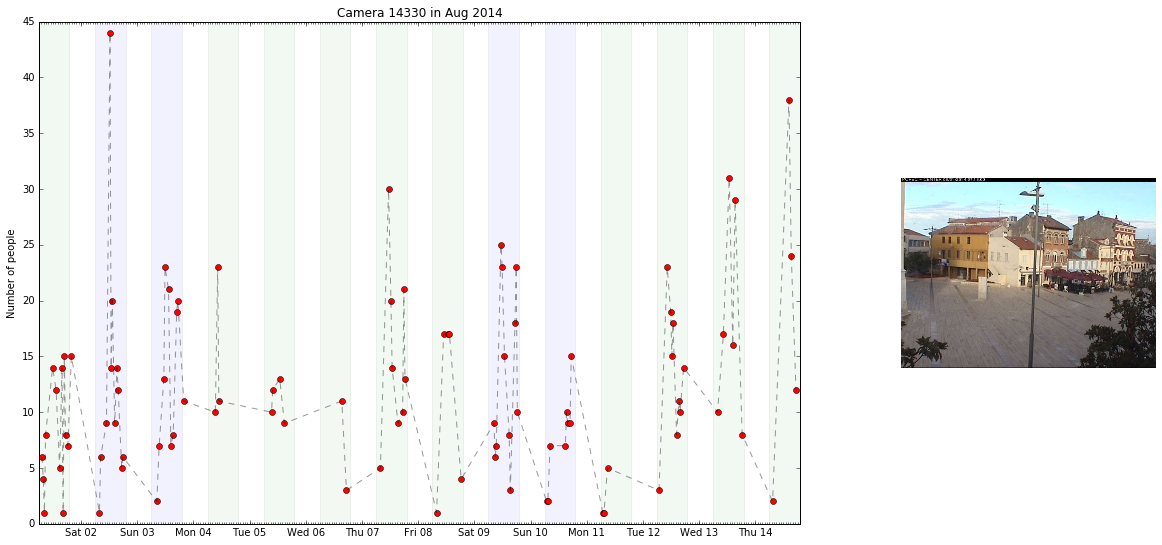

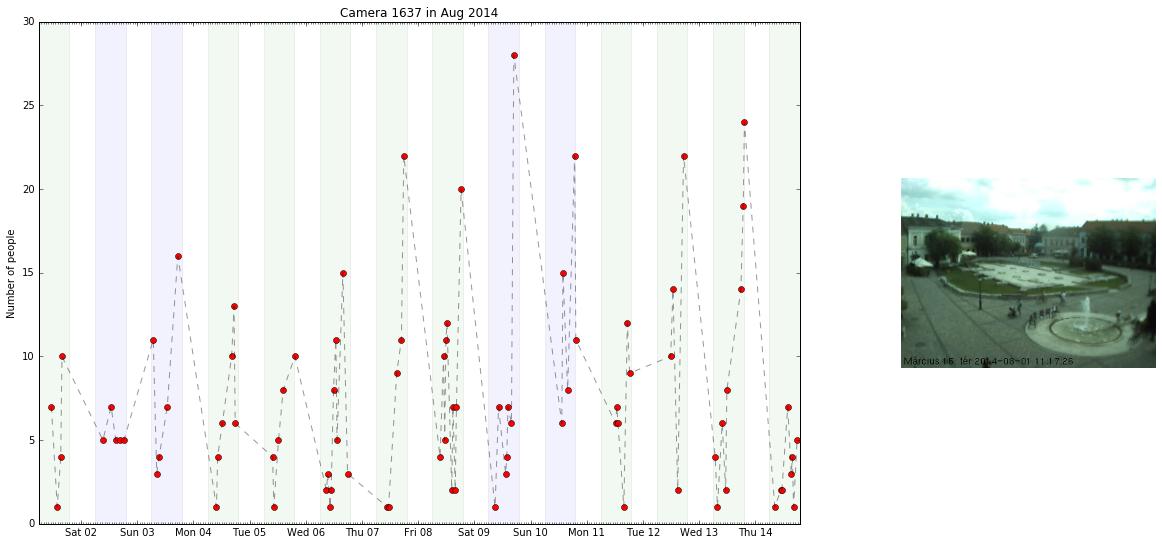

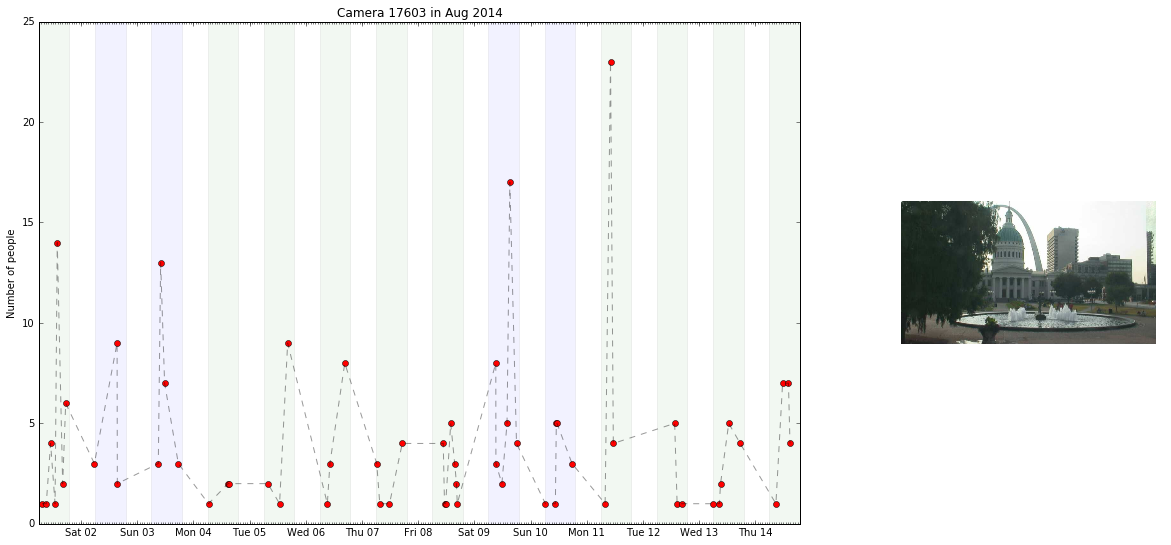

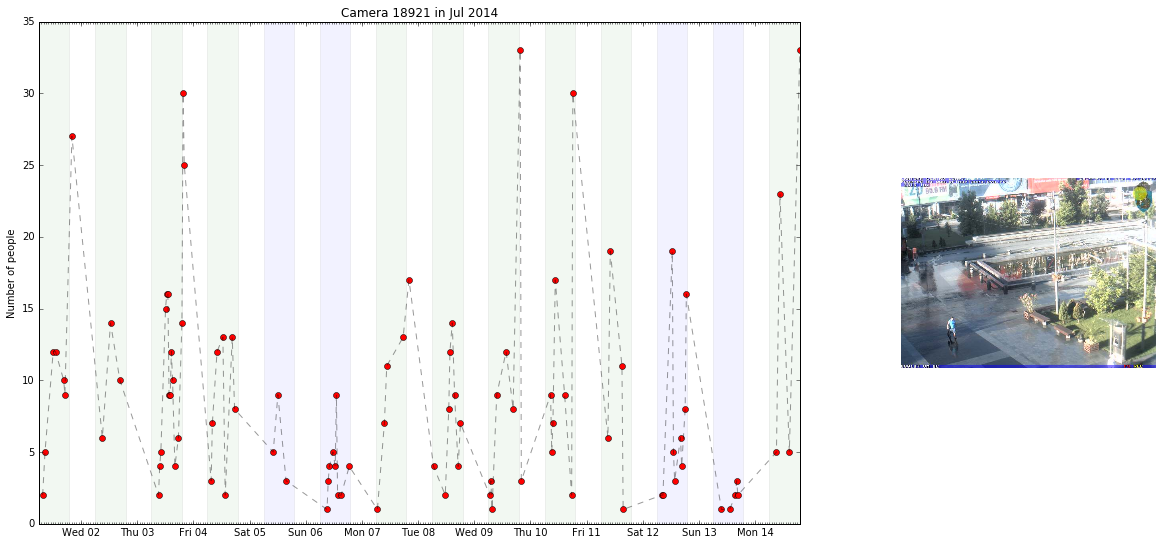

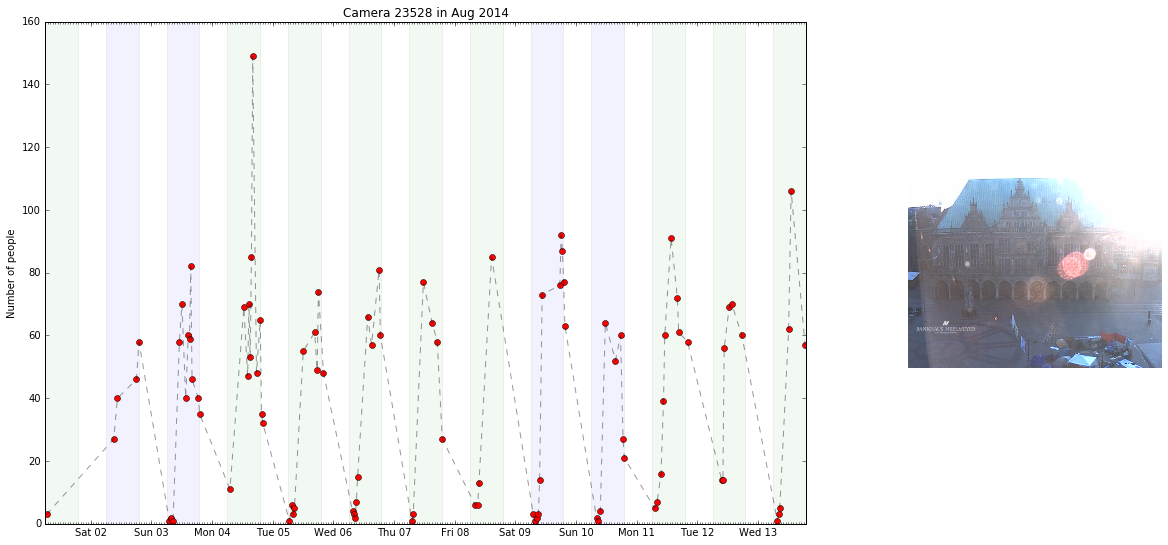

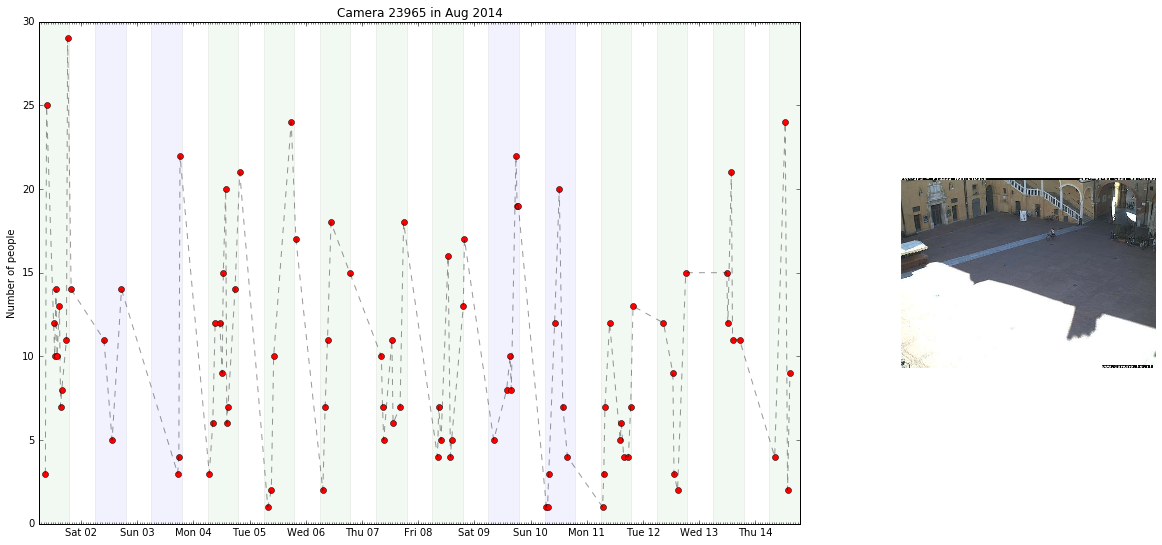

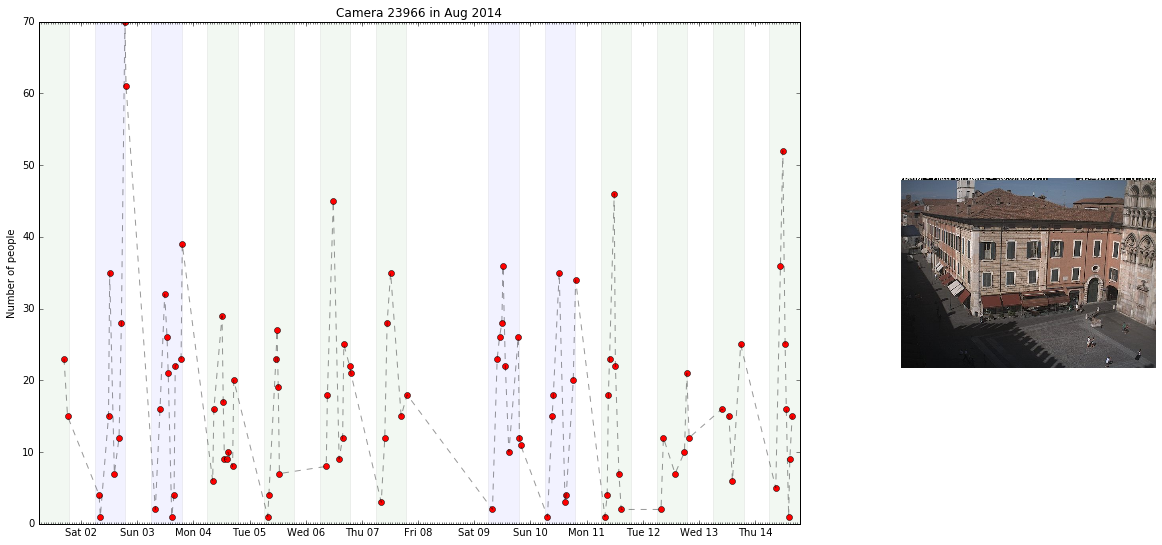

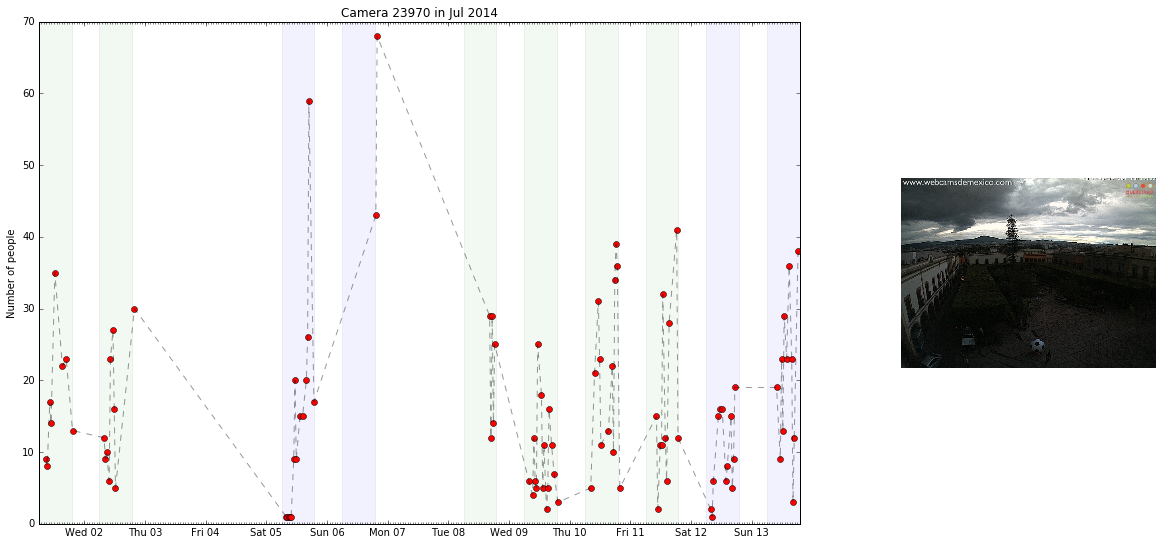

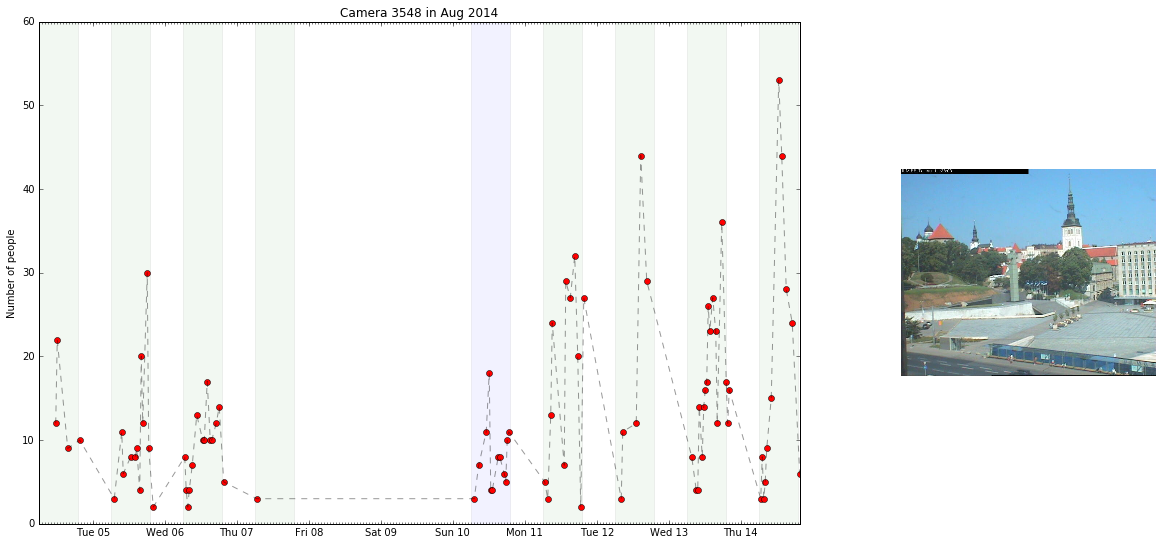

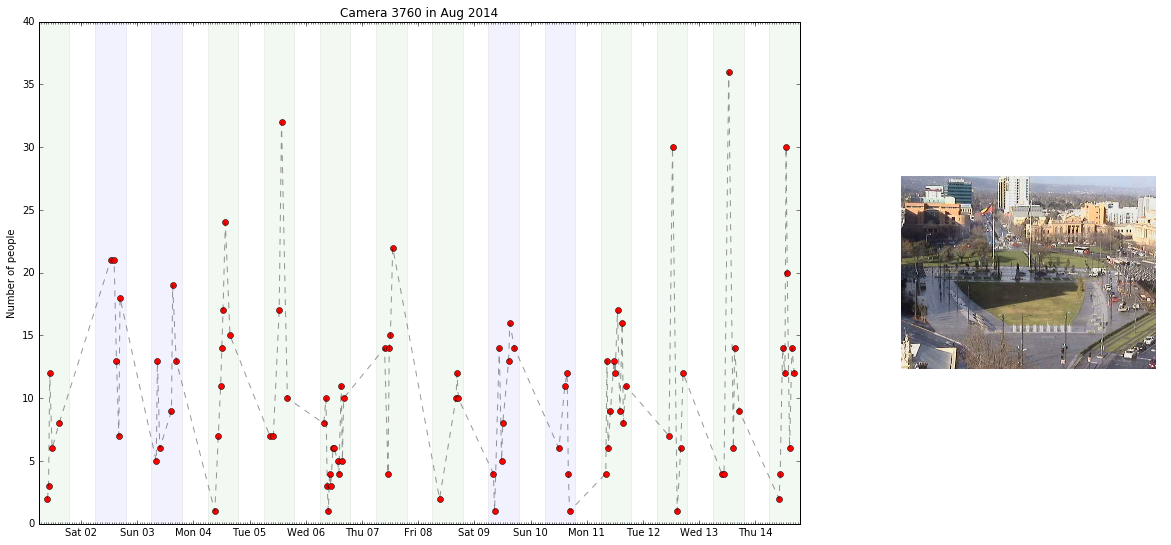

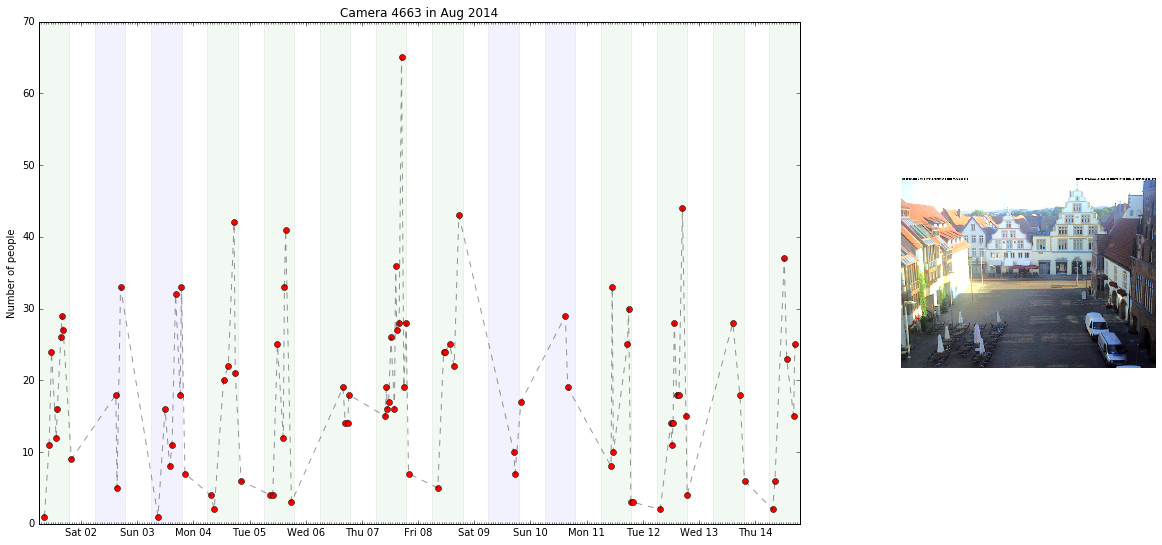

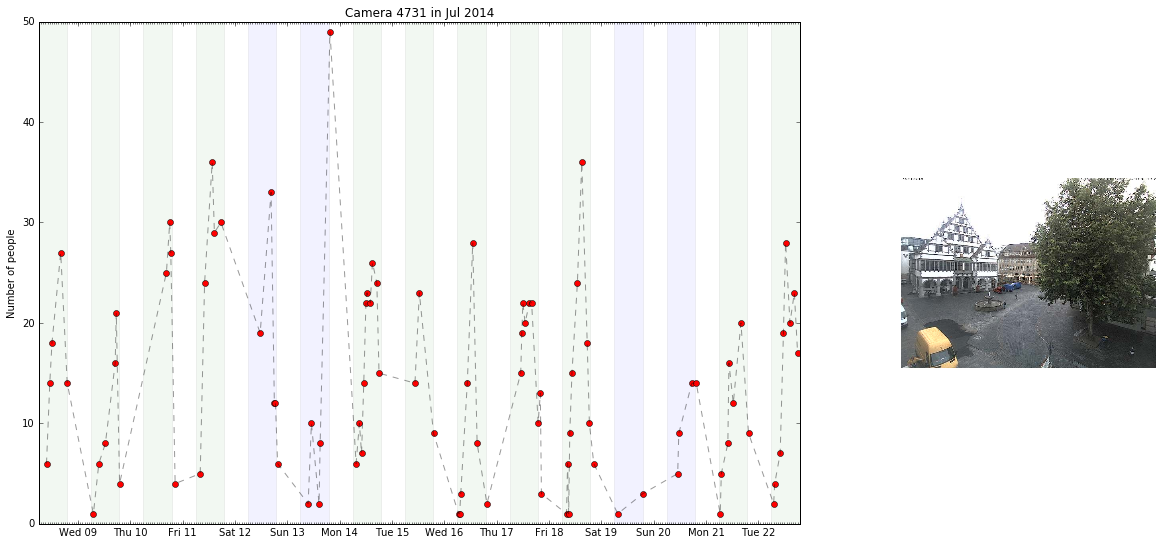

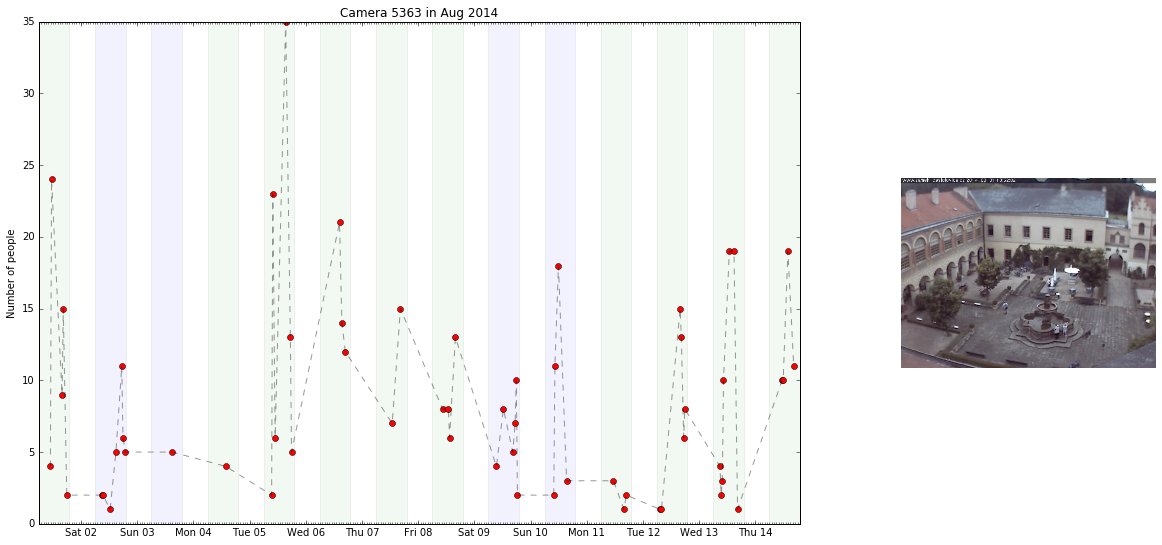

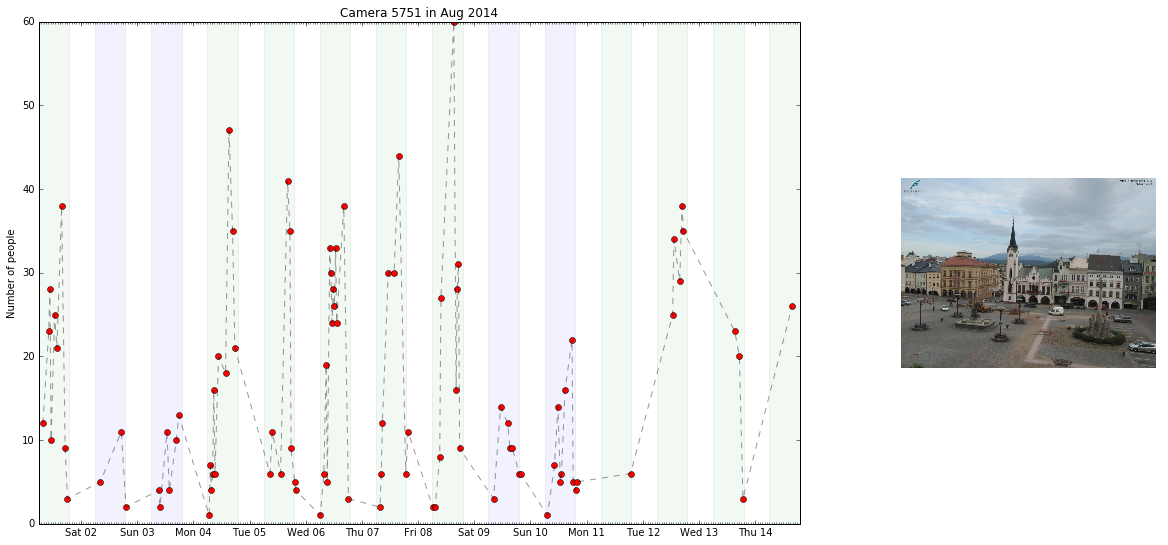

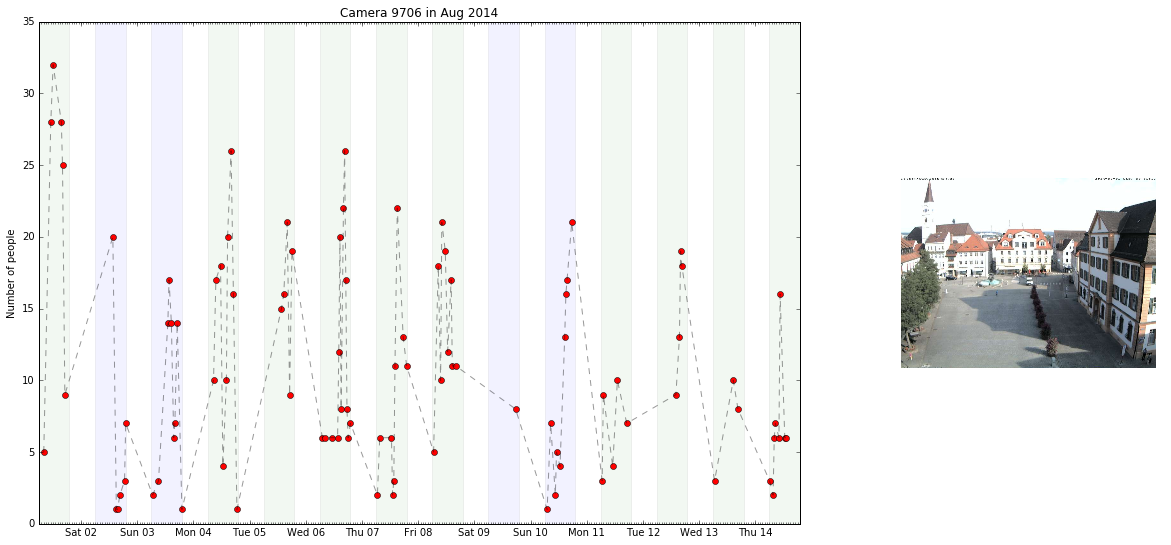

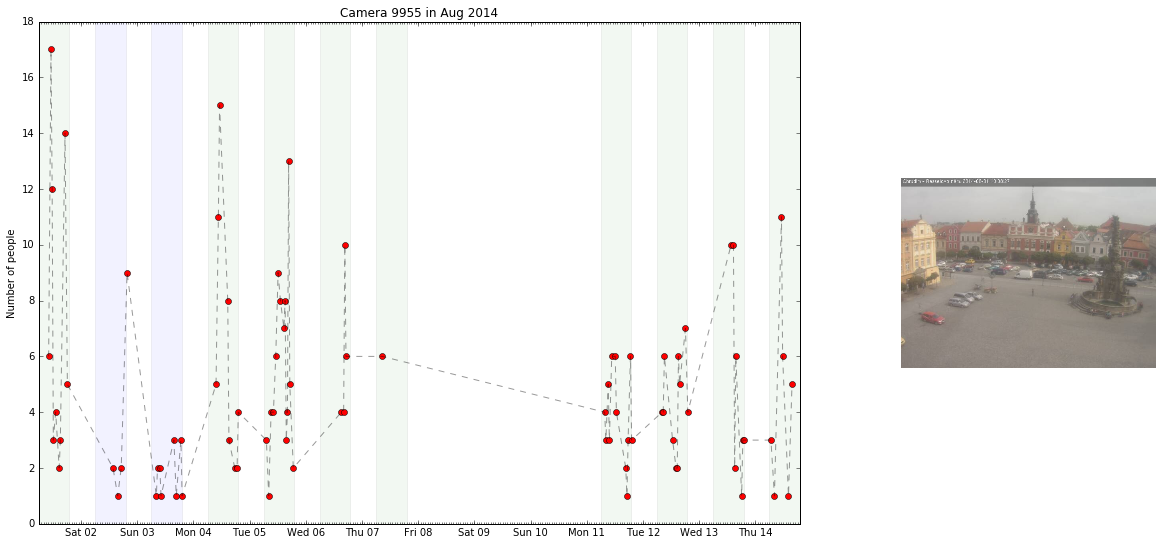

In [4]:
vectors = gscript.read_command('g.list', type='vector', pattern="people_filtered_*", mapset='.').strip().split()
for vector in vectors:
    show_people_in_time(vector)

# Adelaide (camera 3760)

Look at the reconstructed plaza (camera 3760) before reconstruction.

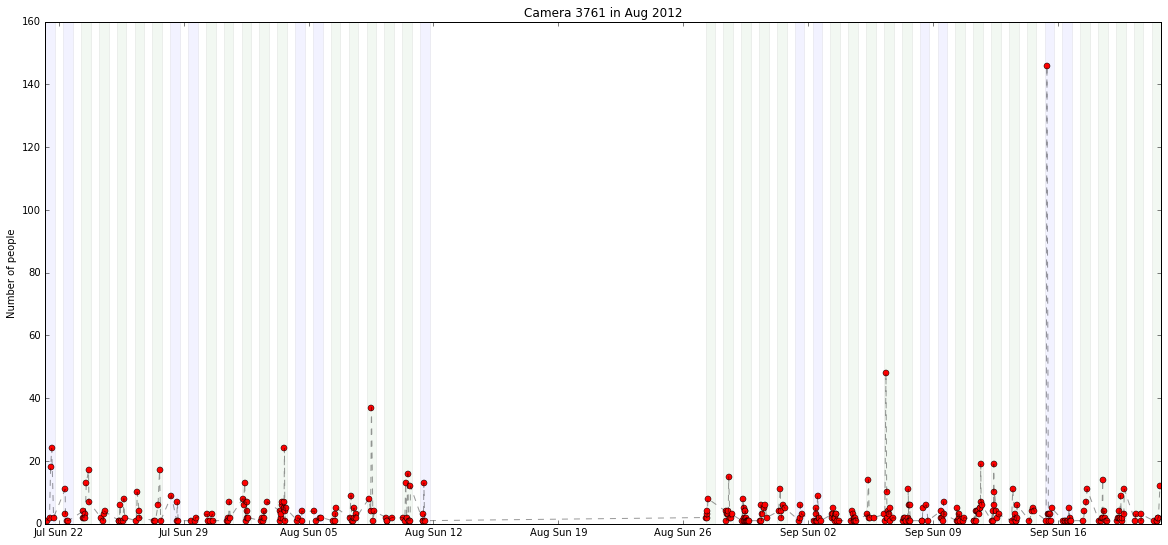

In [128]:

def show_people_in_time(vector):
    res = gscript.read_command('v.db.select', map=vector, columns='cat,date,time', flags='c').strip()
    times = []
    last = None
    count = []
    n = 0

    for line in res.splitlines():
        cat, date, time = line.split('|')
        m, d, y = date.split('/')
        h, mn, s = time.split(':')
        t = dt.datetime(year=2000 + int(y), month=int(m), day=int(d), hour=int(h),
                        minute=int(mn), second=int(s))
        if last is None:
            last = t
            n = 1
        elif last != t:
            times.append(last)
            count.append(n)
            last = t
            n = 1
        else:
            n += 1

    spans = []
    spans_weekend = []
    for t in {t.date() for t in times}:
        a = dt.datetime(t.year, t.month, t.day, hour=6)
        b = dt.datetime(t.year, t.month, t.day, hour=19)
        if t.weekday() in (5, 6):
            spans_weekend.append((a, b))
        else:
            spans.append((a, b))

    count = [y for (x, y) in sorted(zip(times, count), key=lambda pair: pair[0])]
    times.sort()
    hours = mdates.HourLocator()  # every month
    days = mdates.DayLocator(interval=7)  # every month
    f, ax1 = plt.subplots(1, 1)
    ax1.plot(times, count, 'ro')
    ax1.plot(times, count, 'k--', alpha=0.4)
    for a, b in spans:
        ax1.axvspan(a, b, facecolor='g', alpha=0.05)
    for a, b in spans_weekend:
        ax1.axvspan(a, b, facecolor='b', alpha=0.05)
    ax1.xaxis.set_major_locator(days)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %a %d"))
    ax1.xaxis.set_minor_locator(hours)
    ax1.set_title("Camera " + vector.split('_')[-1] + " in " + t.strftime("%b") + ' ' + str(t.year))
    ax1.set_ylabel("Number of people")
    path = "/home/anna/Documents/Projects/Hipp_STC/pictures/camera_"
    plt.show()
show_people_in_time('people_3761')

The weird peak on Saturday 15th of September is this picture. There does not seem to be 150 people.

In [123]:
Image(url='http://amos.cse.wustl.edu/image/3760/20120915_233632.jpg')

# Variability across days

In [267]:
def show_people_in_time2(vector):
    res = gscript.read_command('v.db.select', map=vector, columns='cat,date,time', flags='c').strip()
    times = []
    last = None
    count = []
    n = 0

    for line in res.splitlines():
        cat, date, time = line.split('|')
        m, d, y = date.split('/')
        h, mn, s = time.split(':')
        t = dt.datetime(year=2000 + int(y), month=int(m), day=int(d), hour=int(h),
                        minute=int(mn), second=int(s))
        if last is None:
            last = t
            n = 1
        elif last != t:
            times.append(last)
            count.append(n)
            last = t
            n = 1
        else:
            n += 1
    color=iter(cm.Set1(np.linspace(0, 1, len({t.date() for t in times}))))   
    count = [y for (x, y) in sorted(zip(times, count), key=lambda pair: pair[0])]
    times.sort()
    
    x = {}
    for t in {t.hour for t in times}:
        x[t] = []

    for t in {t.date() for t in times}:
        ttlist = []
        cntlist = []
        for tt, cnt in zip(times, count):
            # if this is the day
            if tt.year == t.year and tt.month == t.month and tt.day == t.day:
                ttlist.append(dt.datetime(2014, 8, 1, tt.hour, tt.minute))
                cntlist.append(cnt)
                if tt.minute > 30 and (tt.hour + 1) in x:
                    x[tt.hour + 1].append(cnt)
                else:
                    x[tt.hour].append(cnt)
        c = next(color)
        plt.plot_date(ttlist, cntlist, 'o', color=c)
        plt.plot_date(ttlist, cntlist, '-', color=c, alpha=0.5)
    average = []
    maxim = []
    minim = []
    stddev = []
    alltimes = x.keys()
    alltimes.sort()
    for each in alltimes:
        if x[each]:
            average.append(np.mean(x[each]))
            maxim.append(np.max(x[each]))
            minim.append(np.min(x[each]))
            stddev.append(np.std(x[each]))
        else:
            average.append(np.nan)
            maxim.append(np.nan)
            minim.append(np.nan)
            stddev.append(np.nan)

    alltimes = [dt.datetime(2014, 8, 1, h) for h in alltimes]
    plt.plot_date(alltimes, average, '-', color='black')
    # show standard deviation
#     plt.plot_date(alltimes, np.array(average) + np.array(stddev), '-', color='black')
#     plt.plot_date(alltimes, np.array(average) - np.array(stddev), '-', color='black')
    y1 = np.array(average) + np.array(stddev)
    y2 = np.array(average) - np.array(stddev)
    
    plt.fill_between(alltimes, y1, y2,
                     facecolor='gray', interpolate=True, alpha=0.1)
    plt.title("Camera " + vector.split('_')[-1] + " in " + t.strftime("%b") + ' ' + str(t.year))
    plt.ylabel("Number of people")
    plt.show()

These plots show variability during day. The different colors are different days, the grey background shows mean and standard deviation.

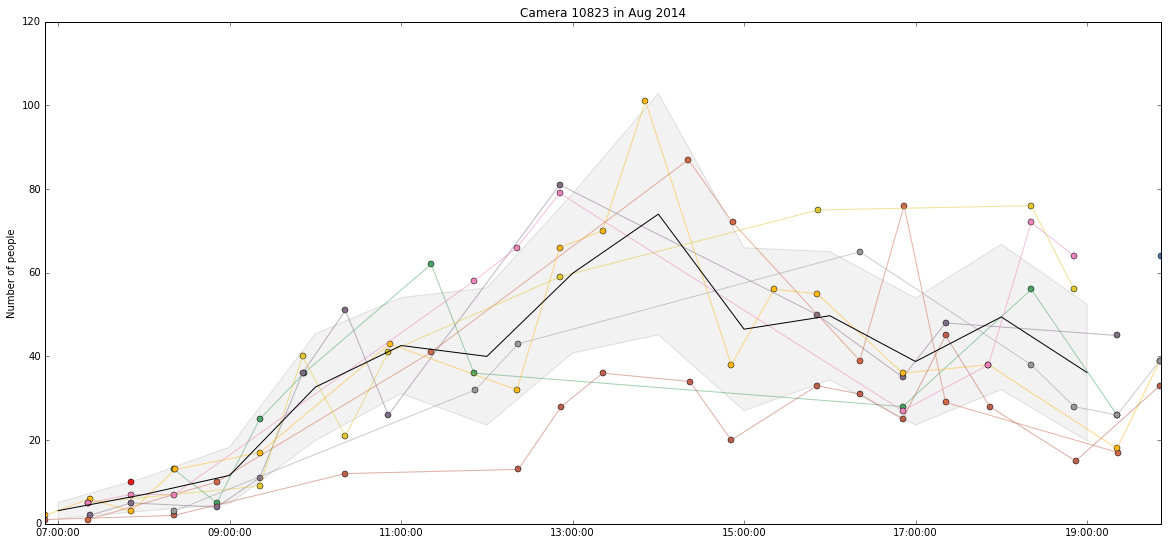

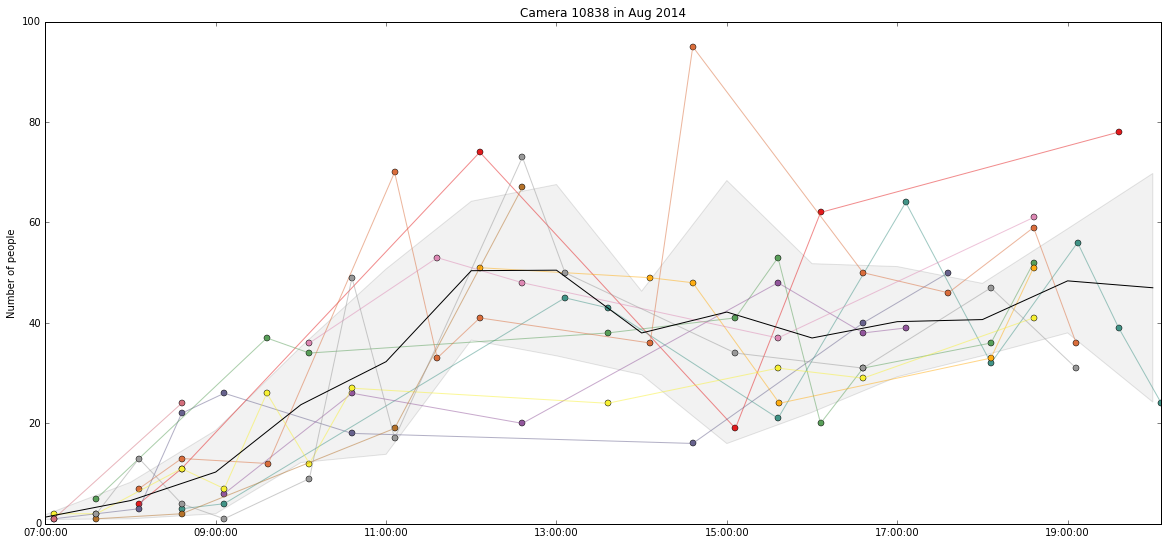

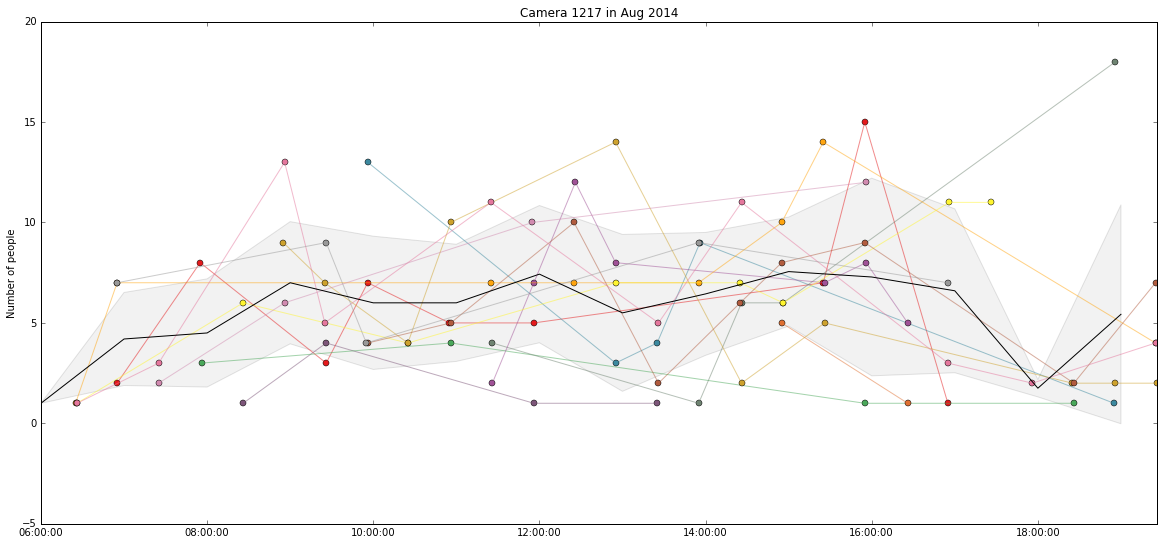

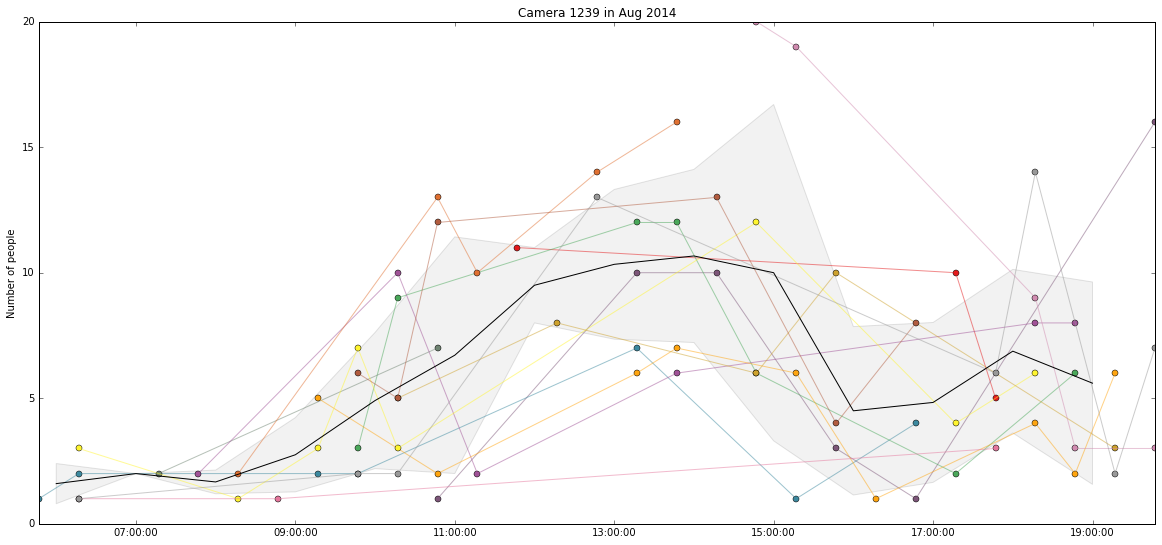

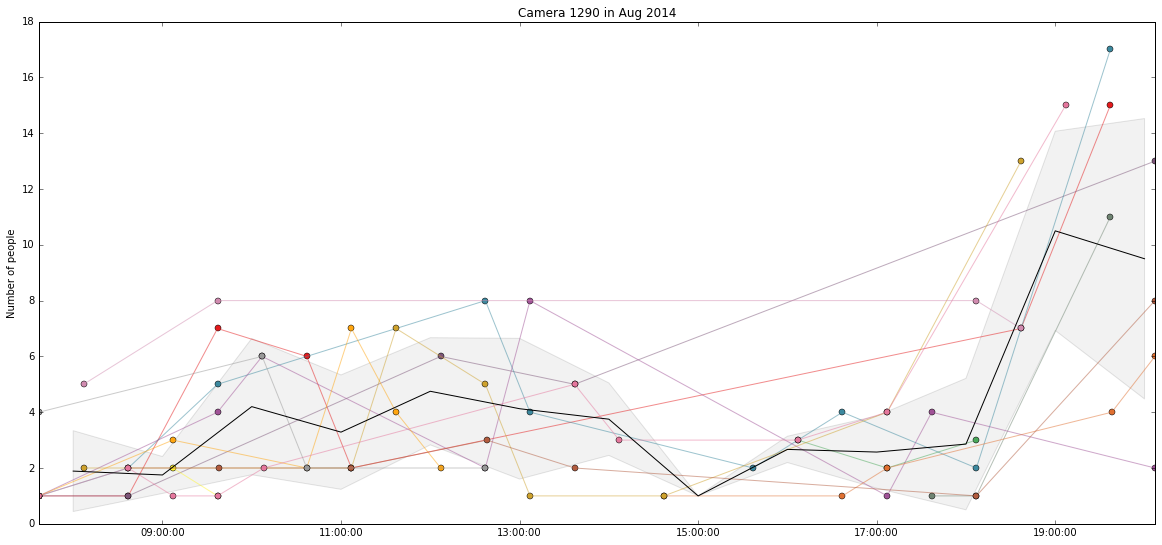

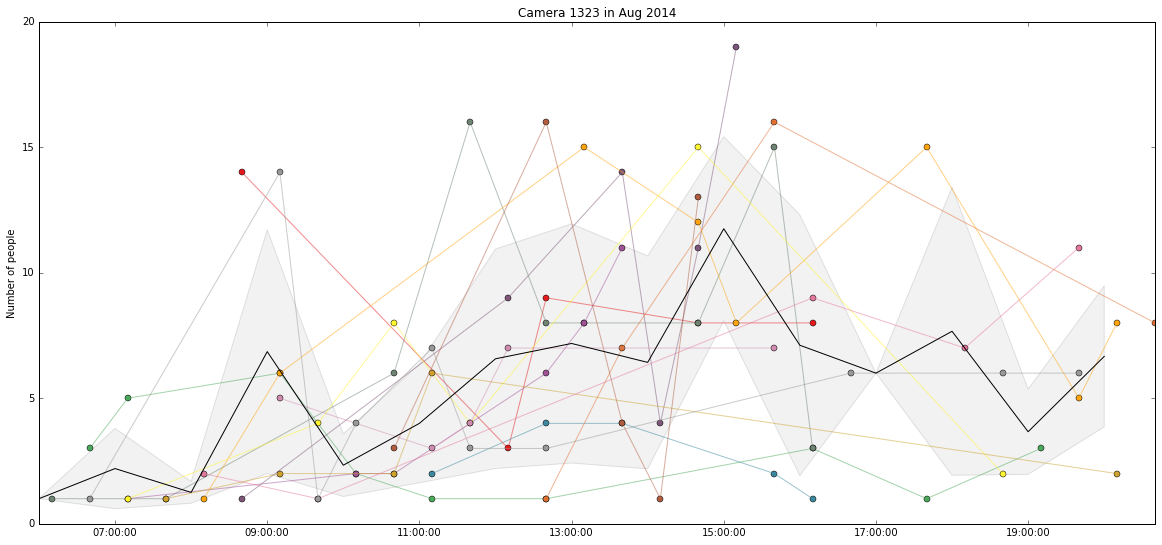

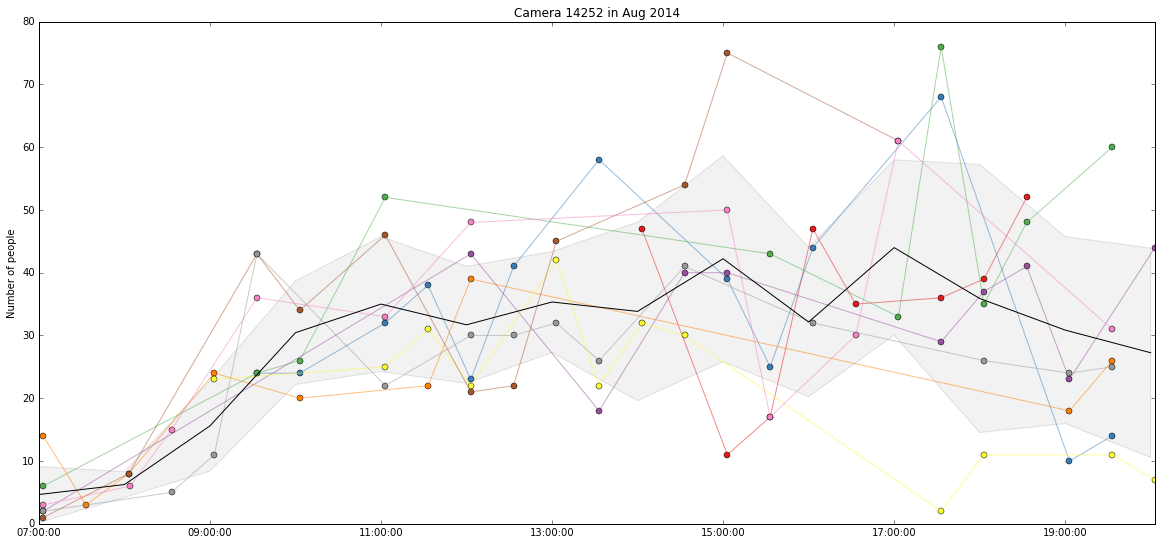

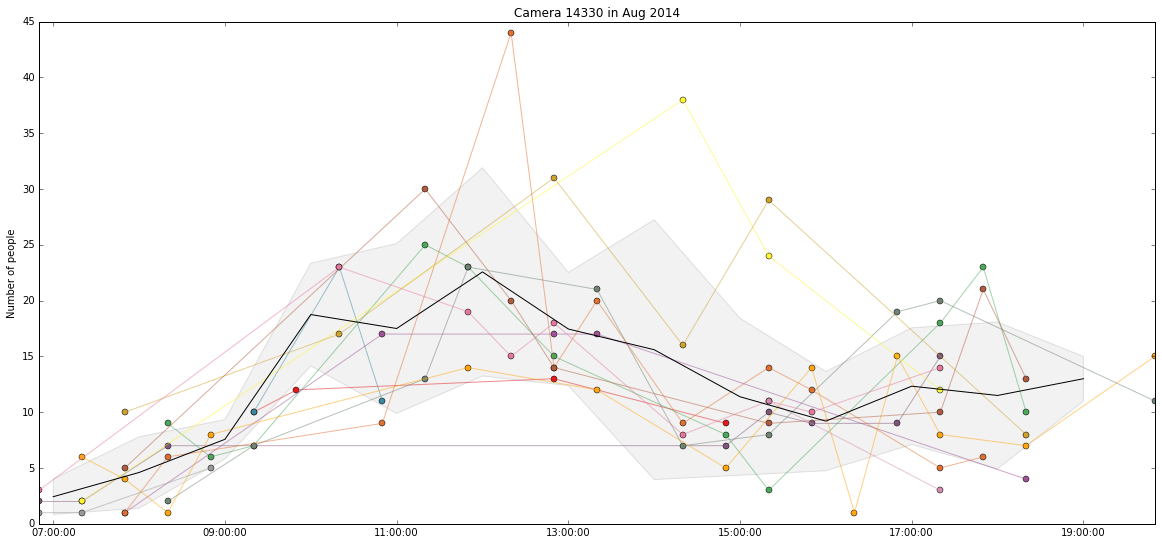

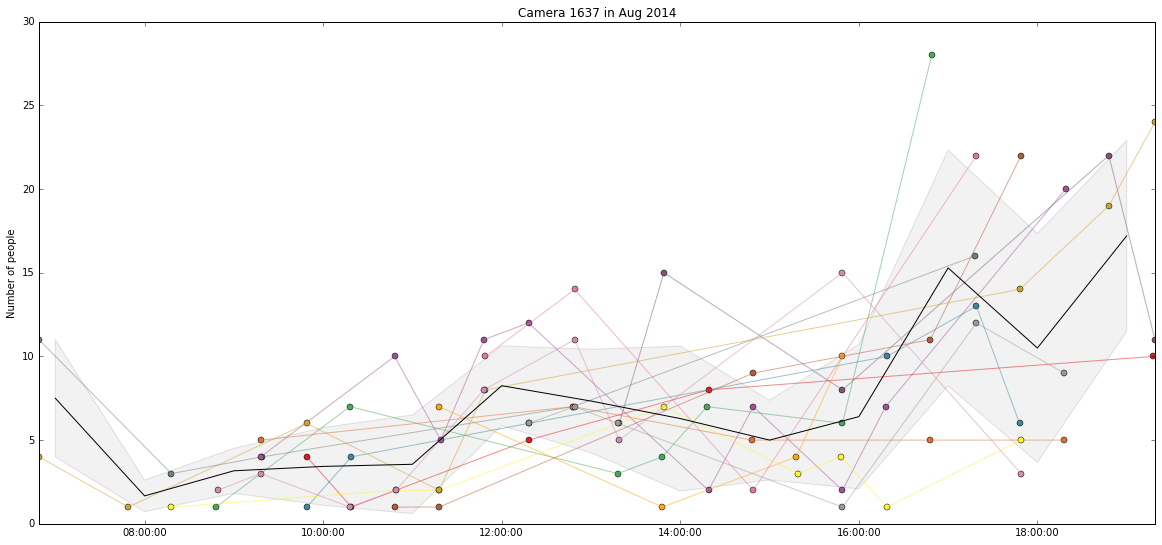

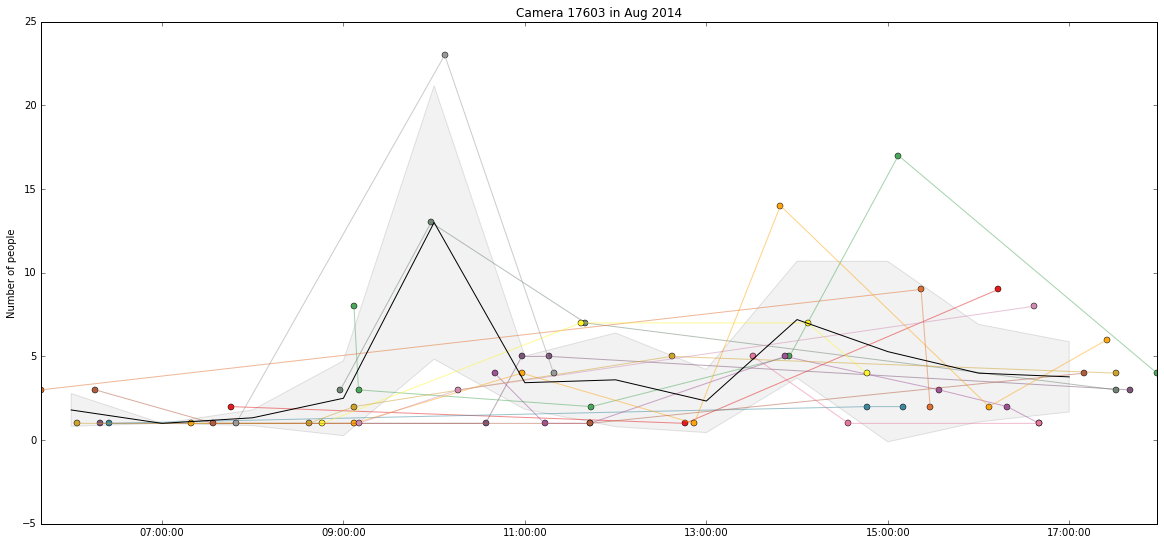

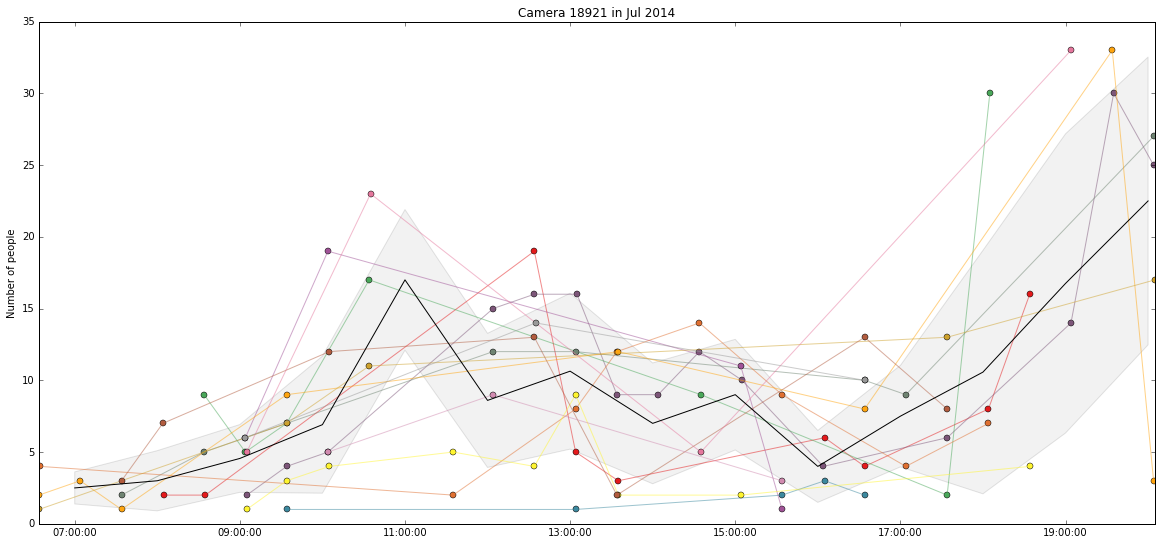

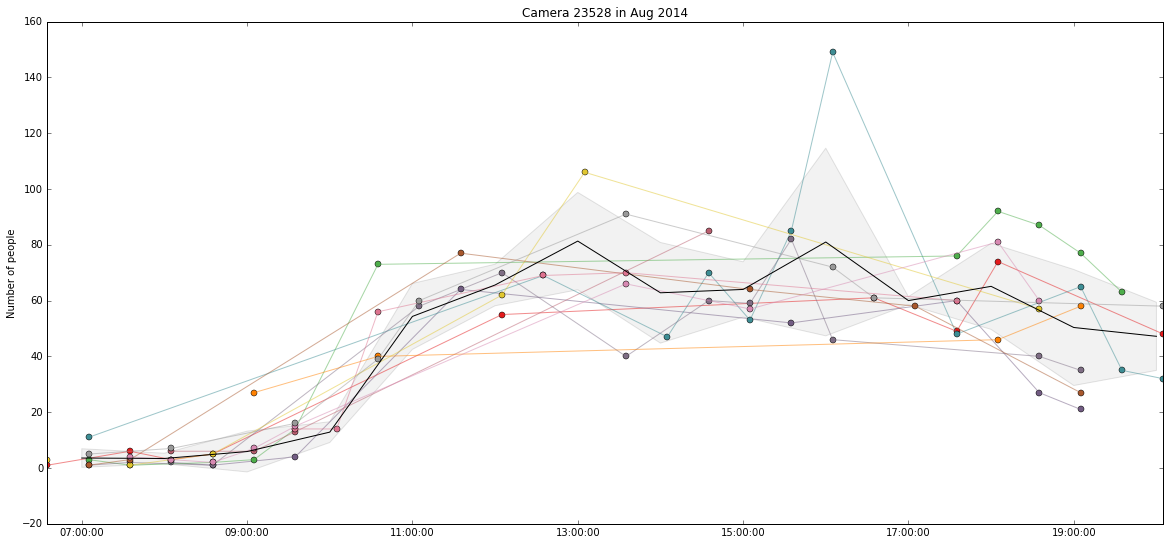

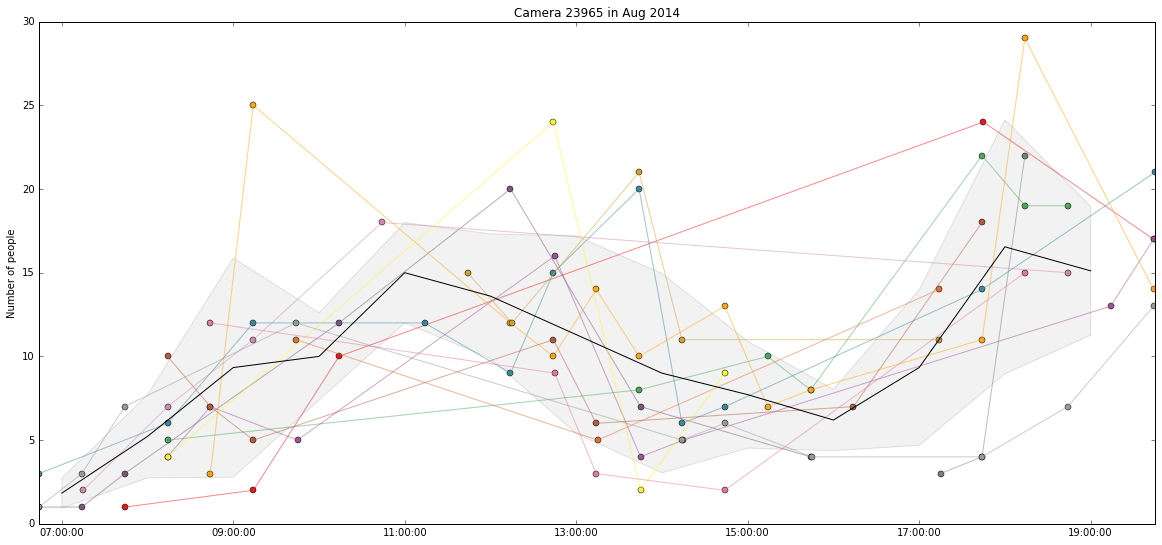

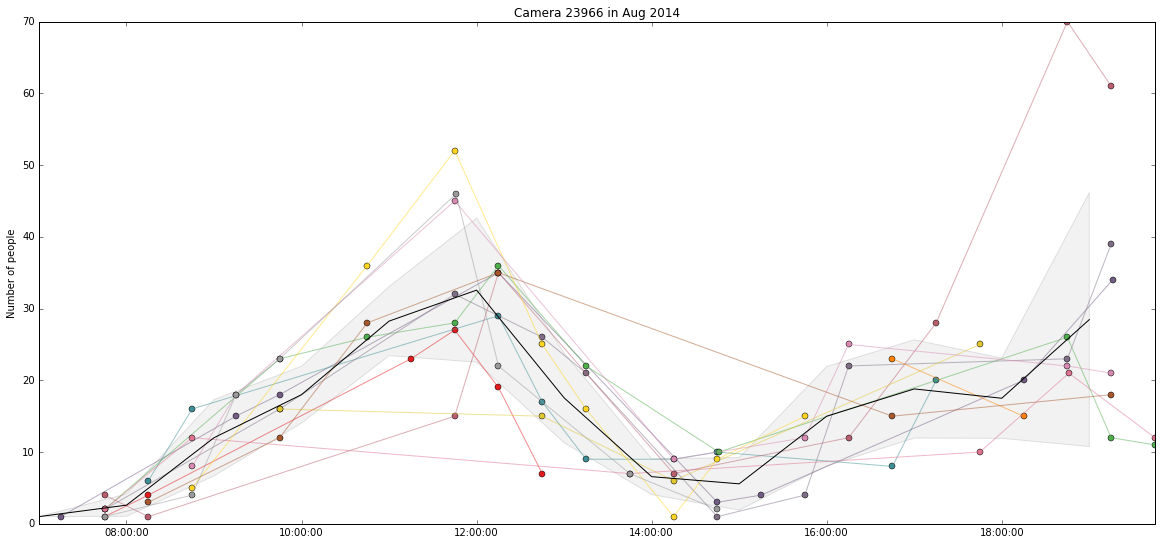

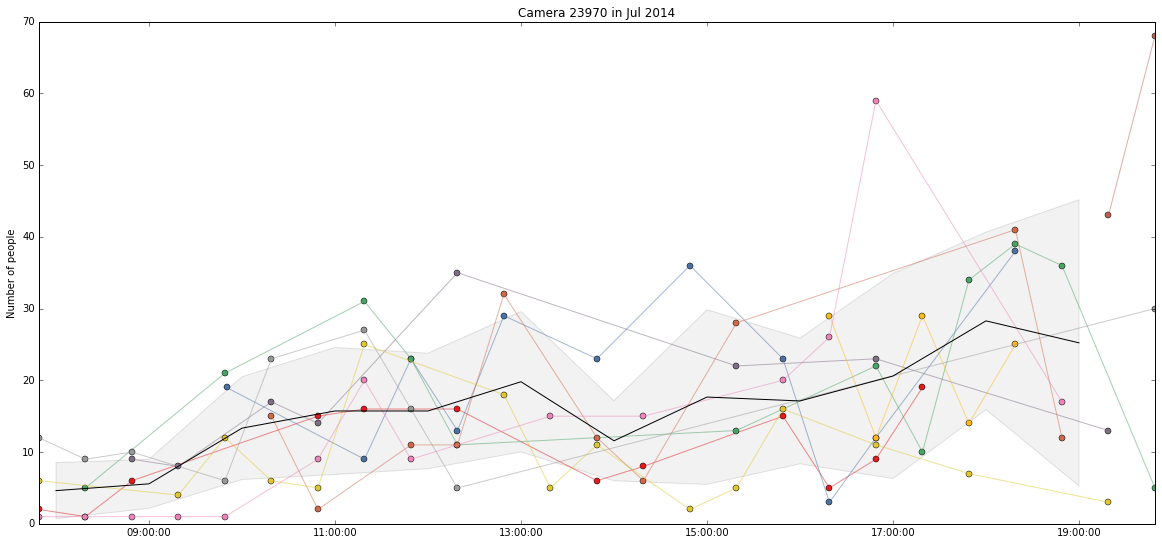

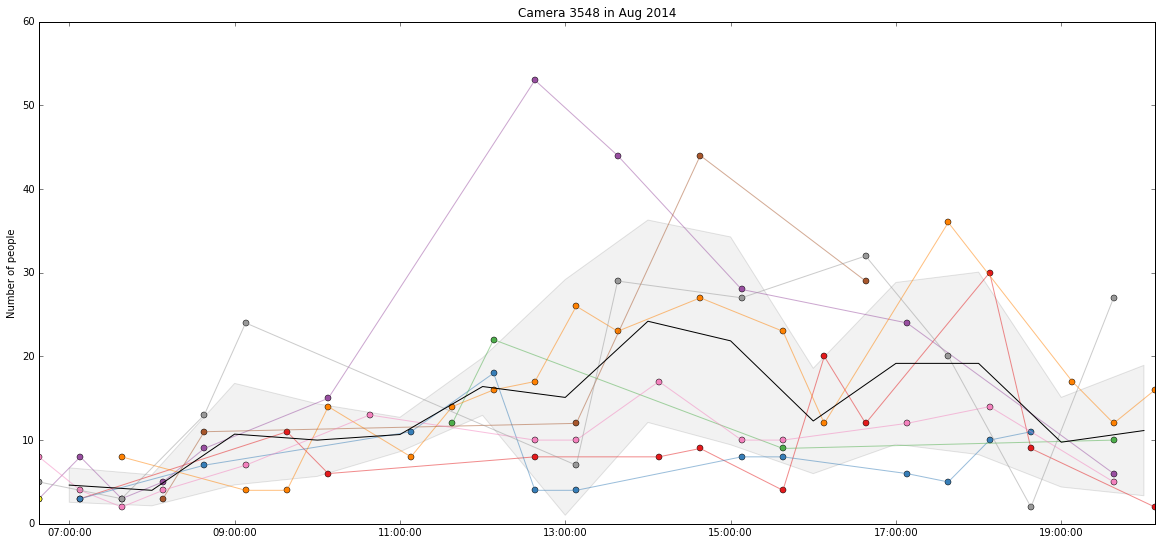

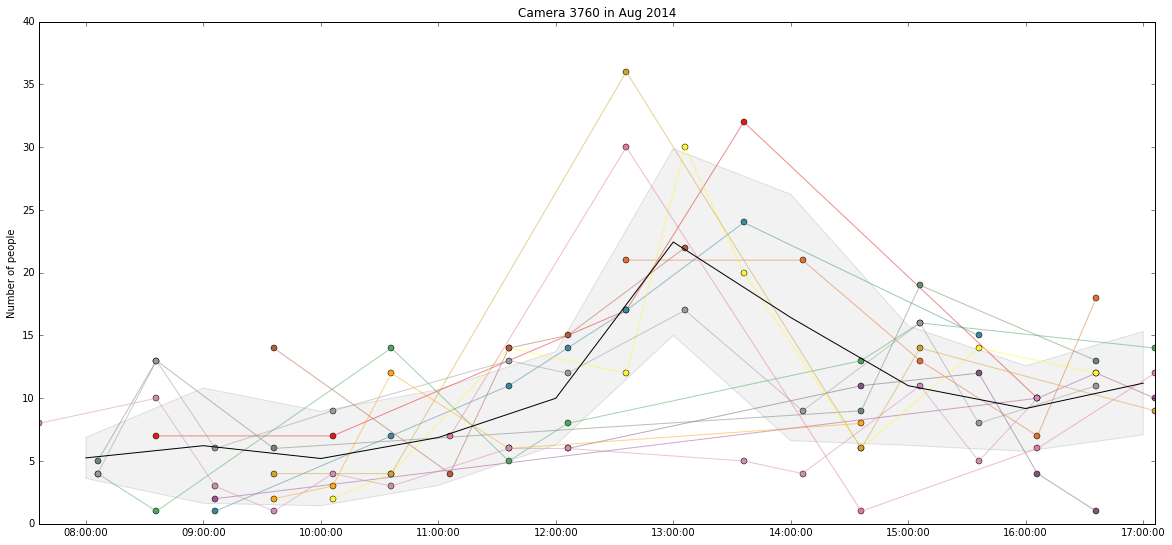

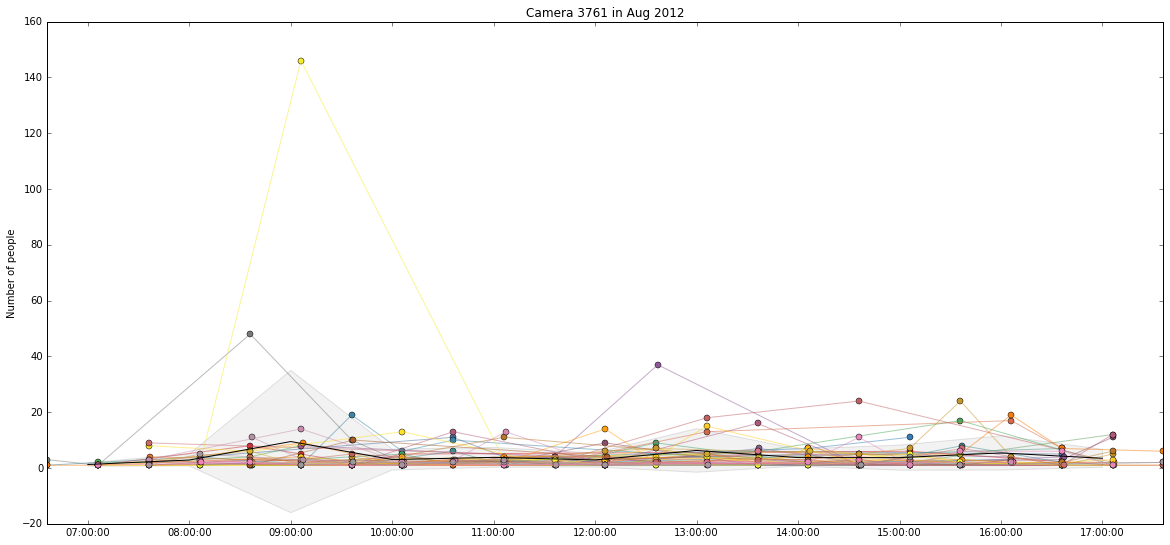

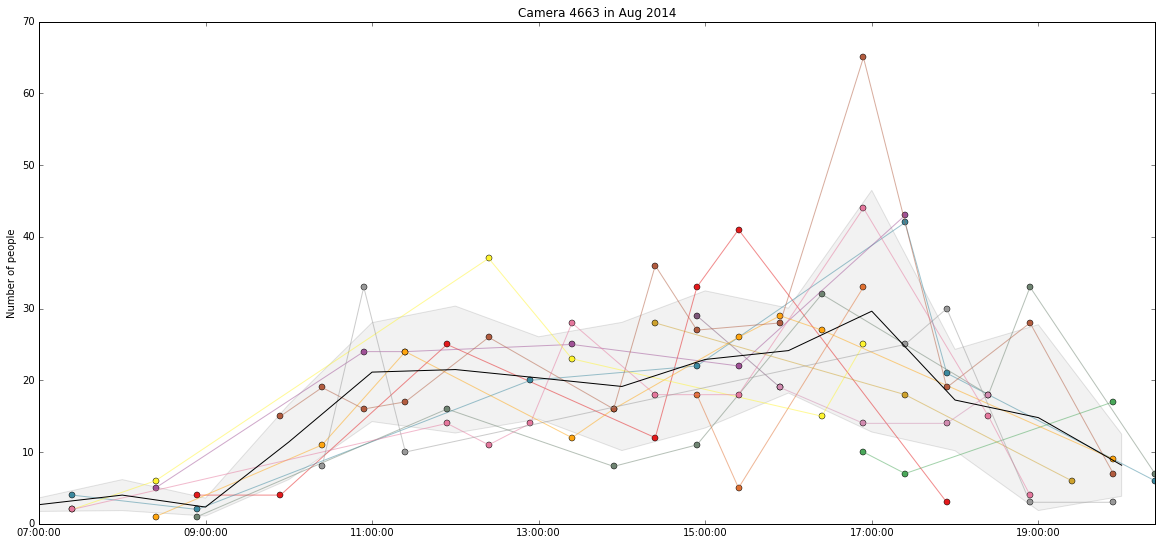

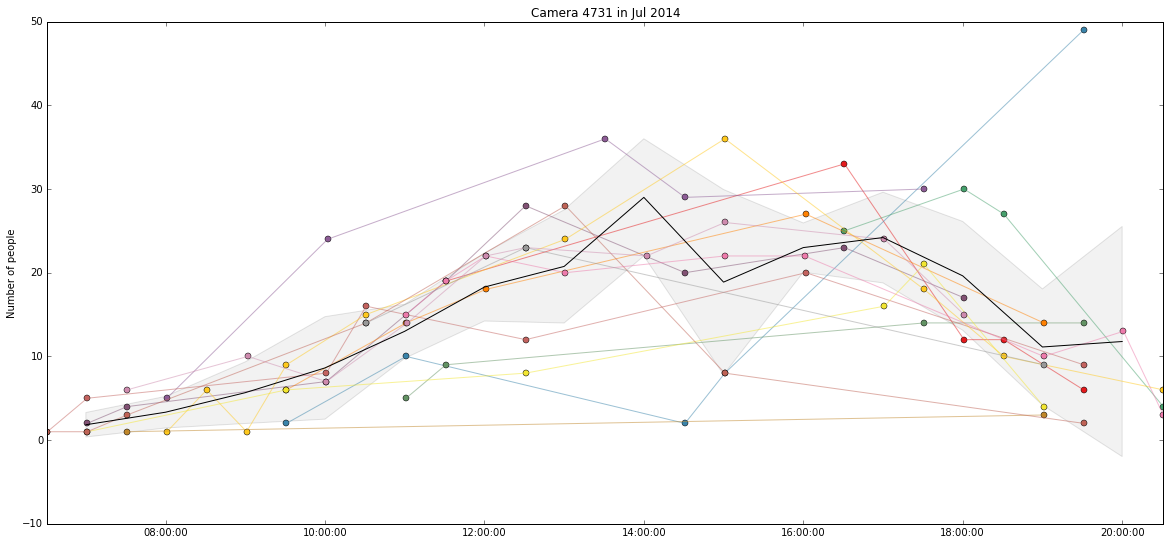

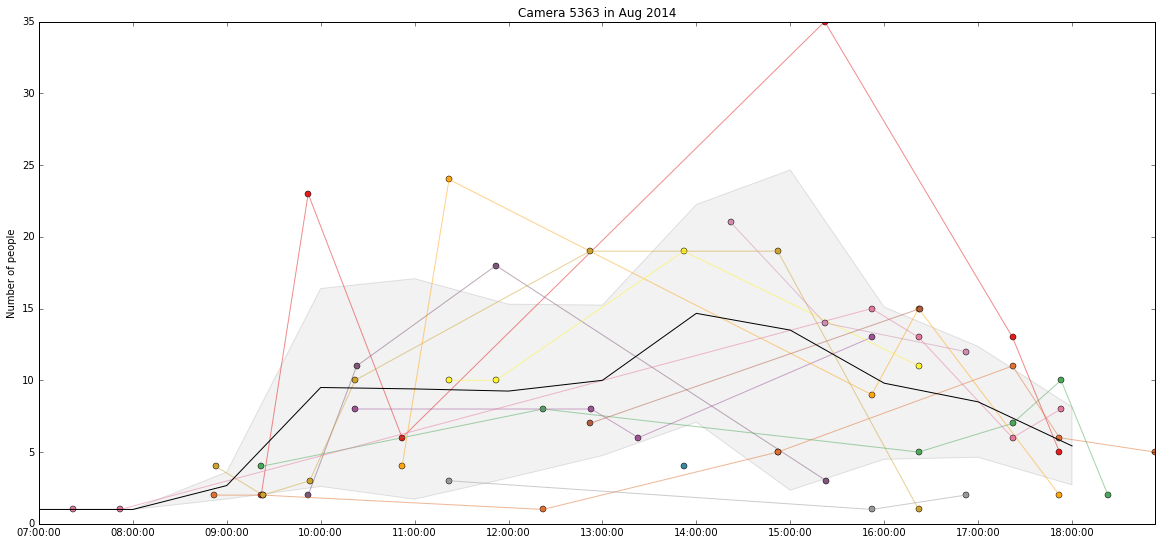

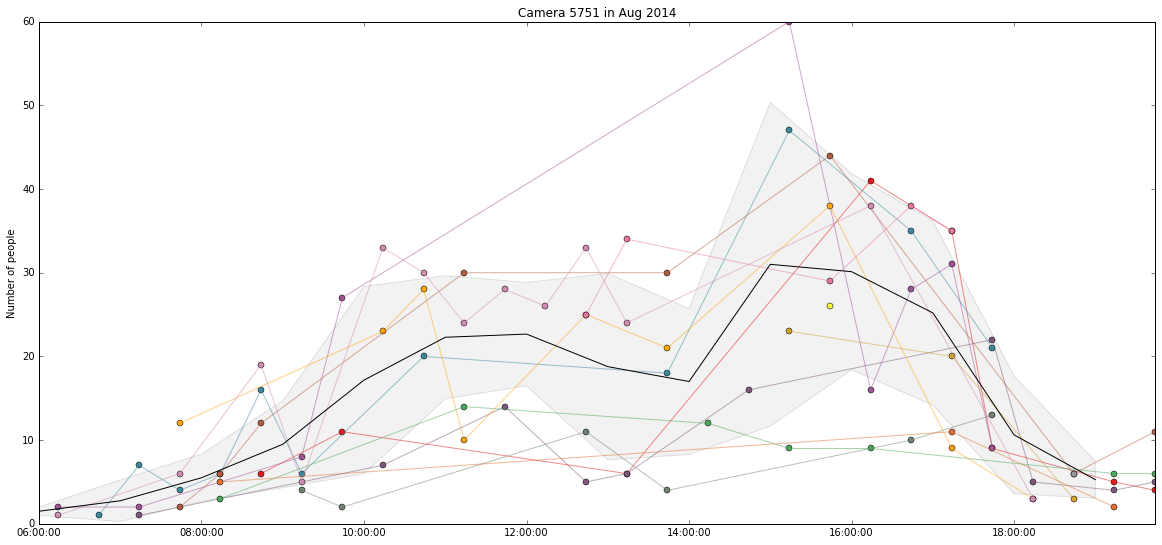

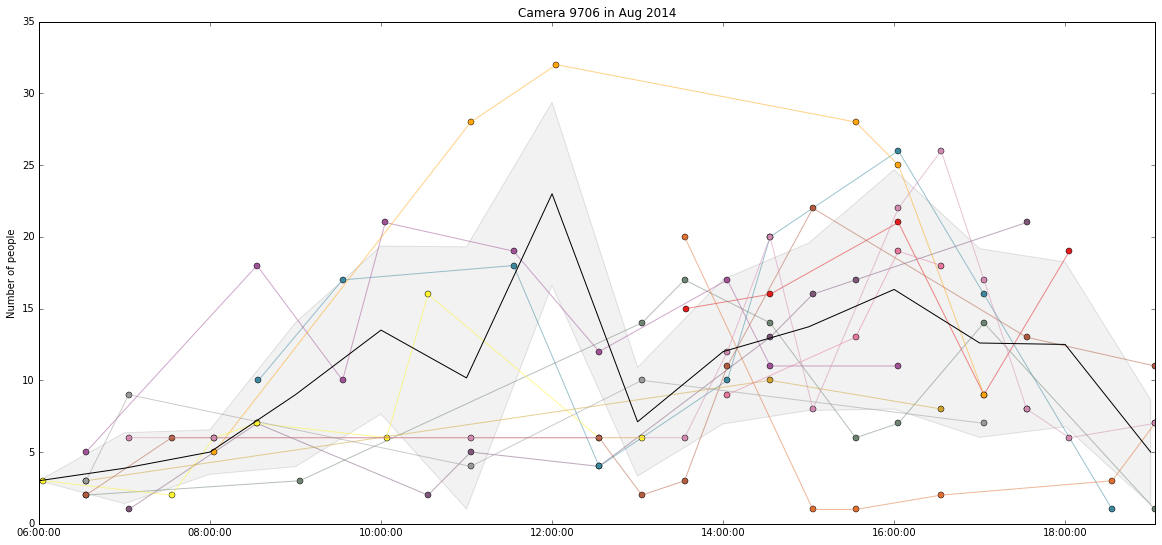

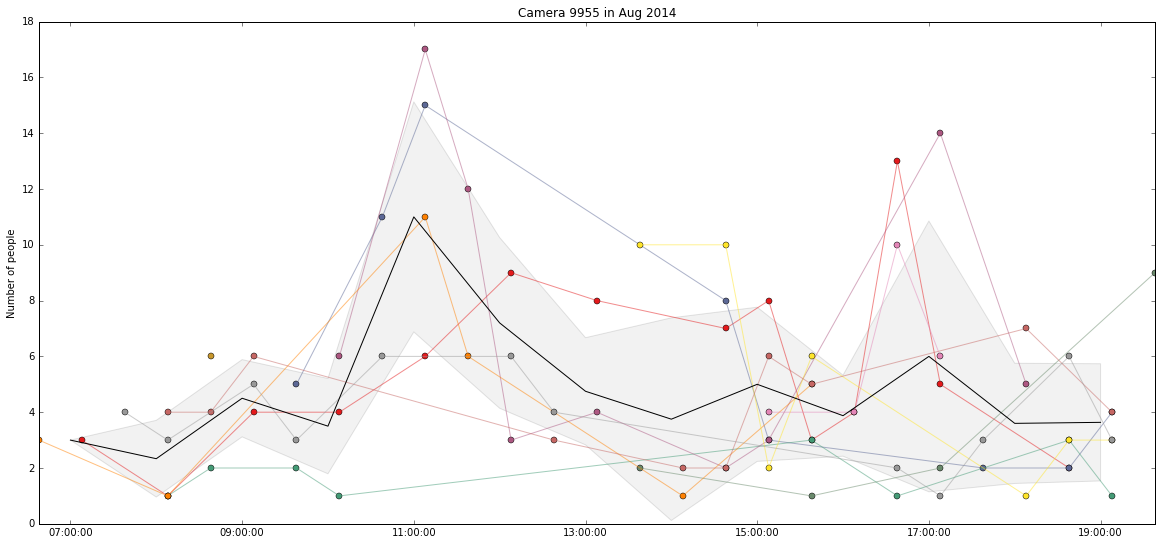

In [269]:
vectors = gscript.read_command('g.list', type='vector', pattern="people_*", exclude="*_*_*").strip().split()
for vector in vectors:
    show_people_in_time2(vector)